# Business Problem

**Amazon is a global e-commerce platform where millions of products are reviewed. This project aims to analyze and model the sentiments expressed in Amazon customer reviews.**

By analyzing the text of the reviews and the ratings given, in-depth information about customer satisfaction and preferences can be obtained. These insights can contribute to product development, targeted marketing strategies, and improvement of customer services. This analysis involves the challenge of efficiently processing large volumes of textual data and accurately  interpreting the nuanced emotions expressed. A successful sentiment analysis and modeling implementation can significantly  contribute to increasing customer trust and loyalty, thereby driving business growth.


# Dataset : 


**Dataset Origin:** This dataset comprises Amazon product reviews, spanning various categories and years.


**Dataset Link : https://www.kaggle.com/datasets/tarkkaanko/amazon**


### **Attributes:**

**ReviewerID:** Unique identifier of the reviewer

**ProductID (asin):** Unique identifier of the product

**ReviewerName:** Name of the reviewer

**ReviewText:** Text of the review

**Overall:** Rating given by the reviewer

**Summary:** Short summary of the review

**UnixReviewTime:** Time of the review (UNIX format)

**ReviewTime:** Time of the review in a human-readable format

**Helpful:** Votes for the review being helpful

**Day_diff:** Number of days between the review time and a specific reference time

**Helpful_yes:** Number of votes indicating the review was helpful

**Total_vote:** Total number of votes for the review


**Objective:** To perform sentiment analysis and sentiment modeling on the review texts to understand customer preferences and satisfaction levels.

# 1 | Importing Libraries

In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
import joblib

# 2 | Adjusting Row Column Settings

In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 3 | Text Preprocessing

In [3]:
# Loading data set

df = pd.read_csv("amazon/amazon_reviews.csv")

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


## 3.1. | Normalizing Case Folding

In [5]:
df['reviewText']

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [6]:
df['reviewText'] = df['reviewText'].str.lower()

In [7]:
df['reviewText']

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

## 3.2 | Punctuations


In [8]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

## 3.3. | Numbers


In [9]:
df['reviewText'] = df['reviewText'].str.replace('\d', '', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

## 3.4 | Stopwords


In [10]:
nltk.download('stopwords')
sw = stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to C:\Users\PADMANI
[nltk_data]     GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

## 3.5. | Rarewords

In [12]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Length: 9701, dtype: int64

In [13]:
drops = temp_df[temp_df <= 1]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [14]:
temp_df_1 = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df_1

card            4603
gb              1725
phone           1685
works           1559
great           1445
                ... 
itupdate           2
intermittant       2
pennies            2
suffer             2
chkdsk             2
Length: 4089, dtype: int64

## 3.6 | Tokenization

In [15]:
# df["reviewText"].apply(lambda x: TextBlob(x).words).head()


nltk.download('punkt')
nltk.download('punkt_tab')

df["reviewText"].apply(lambda x: word_tokenize(x)).head()

[nltk_data] Downloading package punkt to C:\Users\PADMANI
[nltk_data]     GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\PADMANI
[nltk_data]     GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

## 3.7 | Lemmatization

In [16]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\PADMANI
[nltk_data]     GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\PADMANI
[nltk_data]     GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package omw-1.4 to C:\Users\PADMANI
[nltk_data]     GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText']

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

# 4 | Text Visualization


## 4.1. | Calculation of Term Frequencies


In [18]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ['words', 'tf']
tf_sorted = tf.sort_values(by='tf', ascending=False)
tf_sorted

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2723,headline,2.00
2722,sizethe,2.00
2720,everybody,2.00
3690,chkdsk,2.00


In [19]:
tf.shape

(3691, 2)

In [20]:
tf["words"].nunique()

3691

In [21]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   3691.00
mean      32.28
std      140.35
min        1.00
5%         2.00
10%        2.00
25%        2.00
50%        5.00
75%       16.00
80%       23.00
90%       58.00
95%      123.00
99%      514.10
max     5537.00
Name: tf, dtype: float64

## 4.2. | Barplot

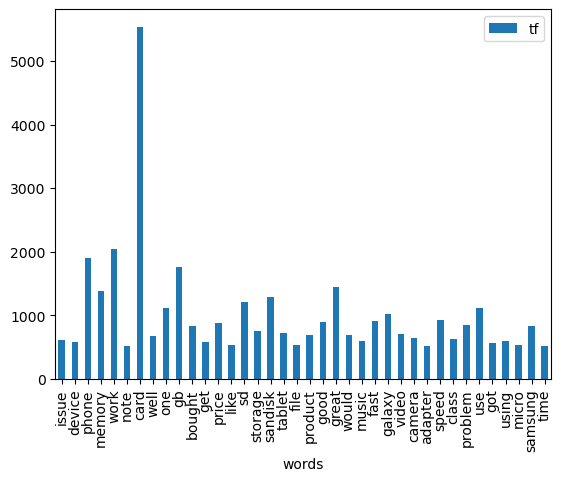

In [22]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show(block=True)

## 4.3. | Word Cloud


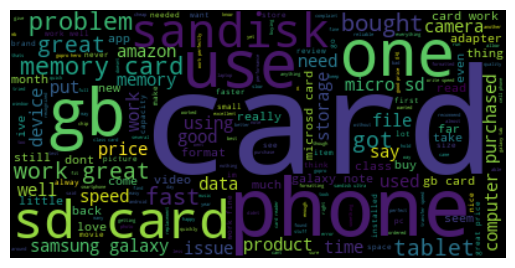

In [23]:
text = " ".join(i for i in df.reviewText)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

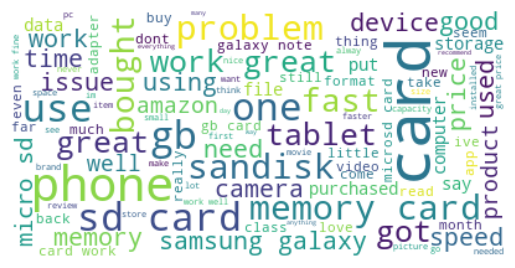

In [24]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

## 4.4. | Word Cloud by Templates


In [25]:
# tr_mask = np.array(Image.open("tr.png"))

# wc = WordCloud(background_color="white",
#                max_words=1000,
#                mask=tr_mask,
#                contour_width=3,
#                contour_color="firebrick")

# wc.generate(text)
# plt.figure(figsize=[10, 10])
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()

## 5 | Sentiment Analysis

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\PADMANI
[nltk_data]     GAYATRI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
df["reviewText"].head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [28]:
sia = SentimentIntensityAnalyzer()

In [29]:
sia.polarity_scores("The toy was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [30]:
sia.polarity_scores("I liked this video but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [31]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [32]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [33]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.87
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92


## 6 | Feature Engineering

In [34]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [35]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos


In [36]:
df["sentiment_label"].value_counts()

pos    3944
neg     971
Name: sentiment_label, dtype: int64

In [37]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [38]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [39]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,1


In [40]:
y = df["sentiment_label"] # dependent variable

In [41]:
X = df["reviewText"] # independent variable

## 6.1. | Count Vectors

In [42]:
vectorizer = CountVectorizer()

In [43]:
X_count = vectorizer.fit_transform(X)

In [44]:
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [45]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [47]:
X_n = vectorizer2.fit_transform(X)

In [48]:
vectorizer2.get_feature_names_out()[10:15]

array(['ability put', 'ability sandisk', 'ability something',
       'ability stick', 'ability store'], dtype=object)

In [49]:
X_n.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## 6.2. | TF-IDF

In [50]:
# word

tf_idf_word_vectorizer = TfidfVectorizer()

In [51]:
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [52]:
# n-gram

tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))

In [53]:
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

## 7 | Sentiment Modeling

## 7.1. | Logistic Regression

In [54]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [55]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.830111902339776

In [56]:
new_review = pd.Series("this product is great")
new_review = pd.Series("look at that shit very bad")
new_review = pd.Series("it was good but I am sure that it fits me")

In [57]:
new_review = TfidfVectorizer().fit(X).transform(new_review)
log_model.predict(new_review)

array([1])

In [58]:
random_review = pd.Series(df["reviewText"].sample(1).values)
new_review = TfidfVectorizer().fit(X).transform(random_review)
log_model.predict(new_review)

array([1])

## 7.2. | Random Forests

In [59]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8392675483214649

In [60]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8272634791454732

In [61]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.7871820956256358

## 7.3. | Hyperparameter Optimization

In [62]:
rf_model = RandomForestClassifier(random_state=17)

In [63]:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

In [64]:
rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [65]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

In [66]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

In [67]:
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8431332655137336

## 7.4. | Naive Bayes Model

In [68]:
# Naive Bayes Model
nb_model = MultinomialNB().fit(X_tf_idf_word, y)
nb_model_score = cross_val_score(nb_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()
nb_model_score

0.8038657171922686

## 7.5. | Support Vector Machine Model

In [69]:
svm_model = SVC(kernel='linear').fit(X_tf_idf_word, y)
svm_model_score = cross_val_score(svm_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()
svm_model_score

0.8514750762970497

# 8. | Save the Model

In [70]:
# Save the model using joblib

joblib.dump(tf_idf_word_vectorizer, 'tfidf_vectorization.pkl')
joblib.dump(log_model, 'logistic_regression_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

# 9. | Predict model

In [71]:
# Predict on a random sample
random_review = pd.Series(df["reviewText"].sample(1).values)
new_review = tf_idf_word_vectorizer.transform(random_review)

log_model_pred = log_model.predict(new_review)
rf_model_pred = rf_model.predict(new_review)
nb_model_pred = nb_model.predict(new_review)
svm_model_pred = svm_model.predict(new_review)

print("Prediction Results:")
print(f"Logistic Regression Prediction: {log_model_pred}")
print(f"Random Forest Prediction: {rf_model_pred}")
print(f"Naive Bayes Prediction: {nb_model_pred}")
print(f"SVM Prediction: {svm_model_pred}")


Prediction Results:
Logistic Regression Prediction: [1]
Random Forest Prediction: [0]
Naive Bayes Prediction: [1]
SVM Prediction: [1]


In [72]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_log = log_model.predict(X_tf_idf_word)
y_pred_rf = rf_model.predict(X_tf_idf_word)
y_pred_nb = nb_model.predict(X_tf_idf_word)
y_pred_svm = svm_model.predict(X_tf_idf_word)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y, y_pred_log))
print(classification_report(y, y_pred_log))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y, y_pred_rf))
print(classification_report(y, y_pred_rf))

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y, y_pred_nb))
print(classification_report(y, y_pred_nb))

print("SVM Confusion Matrix:")
print(confusion_matrix(y, y_pred_svm))
print(classification_report(y, y_pred_svm))

Logistic Regression Confusion Matrix:
[[ 366  605]
 [  18 3926]]
              precision    recall  f1-score   support

           0       0.95      0.38      0.54       971
           1       0.87      1.00      0.93      3944

    accuracy                           0.87      4915
   macro avg       0.91      0.69      0.73      4915
weighted avg       0.88      0.87      0.85      4915

Random Forest Confusion Matrix:
[[ 970    1]
 [3870   74]]
              precision    recall  f1-score   support

           0       0.20      1.00      0.33       971
           1       0.99      0.02      0.04      3944

    accuracy                           0.21      4915
   macro avg       0.59      0.51      0.19      4915
weighted avg       0.83      0.21      0.10      4915

Naive Bayes Confusion Matrix:
[[  66  905]
 [   3 3941]]
              precision    recall  f1-score   support

           0       0.96      0.07      0.13       971
           1       0.81      1.00      0.90      3944

 